In [19]:
import matplotlib
import numpy as np
import xarray as xr

In [13]:
pwd

'/'

In [16]:
directory = '/g/data/ub8/au/treecover'

In [17]:
file = 'ANUWALD.TreeCover.25m.2014.nc'

In [20]:
data = xr.open_dataset(directory, file)

OSError: [Errno -51] NetCDF: Unknown file format: b'/g/data/ub8/au/treecover'

In [15]:
ls -l

total 24
drwxrwsr-x  4 adh157 ub8 4096 Oct 23 14:53 apwm/
drwxrwsr-x 18 avd652 ub8 4096 Jan 25 14:05 au/
drwxrwsr-x 10 avd652 ub8 4096 Aug  7  2017 global/
-rw-rw-r--  1 adh157 ub8  793 Sep 23  2015 license_wald.txt
-rw-rw-r--  1 adh157 ub8  897 May 23  2017 readme.txt
-rw-rw-r--  1 avd652 ub8  658 Mar 24  2016 readme.txt~


In [5]:
cd user/walker/sjw603

/g/data1/xc0/user/walker/sjw603


In [10]:
message = "If you're reading this from a text file, it worked!\n\n\n"
with open('my_file.txt', mode='w') as out:  # open in write-only mode this time
    out.write(message)

In [22]:
def my_sum(collection):
    total = collection[0]  # the first element, remember!
    for value in collection[1:]:  # all the other elements
        total += value
        print (total)
    return total
    print('You never see this')  # because the function has returned

In [23]:
# It works!
print(my_sum([1, 2, 3]), ', ', my_sum(['a', 'b', 'c']))

3
6
ab
abc
6 ,  abc


In [21]:
a = 1
b = [1,2,3,4]

for i in b:
    i += a #Is the same as "i = i + a"
    print (i)
    

2
3
4
5


In [44]:
# Specify the filename and url on two lines for readability
# Note that there are tools to discover these links automatically, but we'll do it manually for now
file_name = 'MCD43A4.2017.073.aust.005.nadir_brdf_adjusted_reflectance.nc'
url = 'http://data.auscover.org.au/thredds/dodsC/auscover/lpdaac-csiro/c5/v2-nc4/aust/MCD43A4.005/2017.03.14/'

# Open the dataset and see what's inside
ds = xr.open_dataset(url + file_name)
ds

<xarray.Dataset>
Dimensions:           (latitude: 7451, longitude: 9580, nv: 2, time: 1)
Coordinates:
  * time              (time) datetime64[ns] 2017-03-14
  * latitude          (latitude) float64 -10.0 -10.01 -10.01 -10.02 -10.02 ...
  * longitude         (longitude) float64 110.0 110.0 110.0 110.0 110.0 ...
Dimensions without coordinates: nv
Data variables:
    crs               int8 ...
    time_bounds       (time, nv) float64 ...
    lat_bounds        (latitude, nv) float64 ...
    lon_bounds        (longitude, nv) float64 ...
    nbar_0620_0670nm  (time, latitude, longitude) float64 ...
    nbar_0841_0876nm  (time, latitude, longitude) float64 ...
    nbar_0459_0479nm  (time, latitude, longitude) float64 ...
    nbar_0545_0565nm  (time, latitude, longitude) float64 ...
    nbar_1230_1250nm  (time, latitude, longitude) float64 ...
    nbar_1628_1652nm  (time, latitude, longitude) float64 ...
    nbar_2105_2155nm  (time, latitude, longitude) float64 ...
    typical_mask      (time,

In [45]:
ds.attrs['summary']

'The Nadir BRDF-Adjusted Reflectance product MCD43A4 provides reflectance data adjusted using a bidirectional reflectance distribution function (BRDF) to model the values as if they were taken from nadir view. (Text from https://lpdaac.usgs.gov/products/modis_products_table/mcd43a4).'

In [46]:

# This is the coordinate array for time.
# Note that arrays have their own metadata, just like the full dataset
ds.time

<xarray.DataArray 'time' (time: 1)>
array(['2017-03-14T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2017-03-14
Attributes:
    long_name:      time
    standard_name:  time
    axis:           T
    bounds:         time_bounds

In [47]:
# Let's check a more complicated data array
ds.nbar_0459_0479nm

<xarray.DataArray 'nbar_0459_0479nm' (time: 1, latitude: 7451, longitude: 9580)>
[71380580 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 2017-03-14
  * latitude   (latitude) float64 -10.0 -10.01 -10.01 -10.02 -10.02 -10.03 ...
  * longitude  (longitude) float64 110.0 110.0 110.0 110.0 110.0 110.0 110.0 ...
Attributes:
    long_name:            MCD43A4(v5) Nadir BRDF-adjusted reflectance for 045...
    standard_name:        surface_bidirectional_reflectance
    units:                1
    valid_range:          [ 0.      3.2766]
    grid_mapping:         crs
    cell_methods:         area: mean time: mean
    ancillary_variables:  typical_mask quality snow
    _ChunkSizes:          [  1 319 410]

In [48]:
# Discard data vars whose name does not start with "nbar_"
vis = ds.drop([n for n in ds.data_vars if not n.startswith('nbar_')])
vis.attrs = {}  # Discard attributes metadata

In [49]:
# This indicates "no start point, no end point, one pixel per 25" - plenty for example charts
zoom = slice(None, None, 25)
# Select every 25th point of lat and lon, and the 0th (first) time step
vis = vis.sel(longitude=zoom, latitude=zoom).isel(time=0)

In [50]:
# And now download this subset, since we'll be reusing it - it'll take a minute or so
vis.load()
vis

<xarray.Dataset>
Dimensions:           (latitude: 299, longitude: 384)
Coordinates:
    time              datetime64[ns] 2017-03-14
  * latitude          (latitude) float64 -10.0 -10.12 -10.24 -10.35 -10.47 ...
  * longitude         (longitude) float64 110.0 110.1 110.2 110.4 110.5 ...
Data variables:
    nbar_0620_0670nm  (latitude, longitude) float64 nan nan nan nan nan nan ...
    nbar_0841_0876nm  (latitude, longitude) float64 nan nan nan nan nan nan ...
    nbar_0459_0479nm  (latitude, longitude) float64 nan nan nan nan nan nan ...
    nbar_0545_0565nm  (latitude, longitude) float64 nan nan nan nan nan nan ...
    nbar_1230_1250nm  (latitude, longitude) float64 nan nan nan nan nan nan ...
    nbar_1628_1652nm  (latitude, longitude) float64 nan nan nan nan nan nan ...
    nbar_2105_2155nm  (latitude, longitude) float64 nan nan nan nan nan nan ...

In [51]:
# Load the graphing library and show images inline, instead of saving to a file
import matplotlib.pyplot as plt
%matplotlib inline

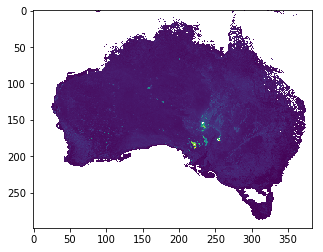

In [52]:
plt.imshow(vis.nbar_0459_0479nm)

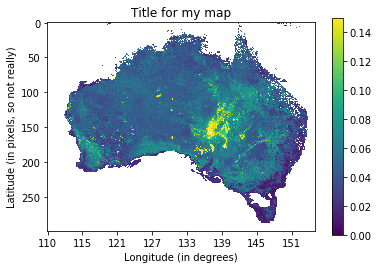

In [53]:
plt.title('Title for my map')
plt.xlabel('Longitude (in degrees)')
plt.xticks(range(0, len(vis.longitude) - 1, 50),        # Where to put the labels - every 50th pixel
           [int(v) for v in vis.longitude.data[::50]])  # What the labels are - every 50th lon, as an integer
plt.ylabel('Latitude (in pixels, so not really)')
plt.imshow(vis.nbar_0459_0479nm, vmin=0, vmax=0.15)
plt.colorbar()

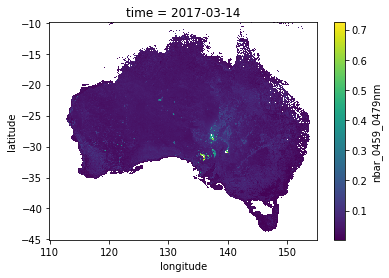

In [54]:
vis.nbar_0459_0479nm.plot.imshow()

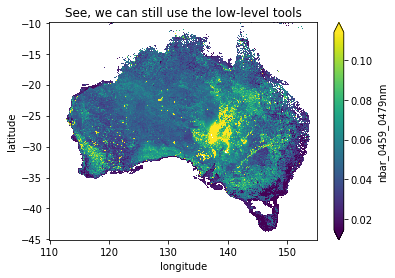

In [55]:
vis.nbar_0459_0479nm.plot.imshow(robust=True)  # will ignore the 0:2 and 98:100 percentiles of any data
plt.title('See, we can still use the low-level tools')

In [56]:
# We prepare for this one by stacking our 2D arrays into a new 3D array,
# along a new dimension called "band"
arr = vis.to_array(dim='band')
arr

<xarray.DataArray (band: 7, latitude: 299, longitude: 384)>
array([[[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       ..., 
       [[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]]])
Coordinates:
    time       datetime64[ns] 2017-03-14
  * latitude   (latitude) float64 -10.0 -10.12 -10.24 -10.35 -10.47 -10.59 ...
  * longitude  (longitude) float64 110.0 110.1 110.2 110.4 110.5 110.6 110.7 ...
  * band       (band) <U1

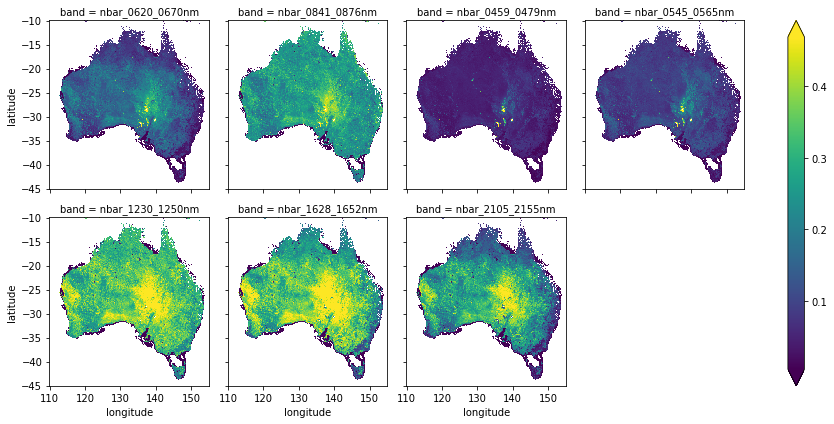

In [57]:
# Now we're dealing with a 'cube' (OK, rectangular prism) of data.
# And... we can draw a faceted plot by slicing along an axis:
arr.plot.imshow(robust=True, col='band', col_wrap=4)

In [58]:

# We'll give the bands english names instead of using nanometer measurements
blue = vis.nbar_0459_0479nm
green = vis.nbar_0545_0565nm
red = vis.nbar_0620_0670nm
nir = vis.nbar_0841_0876nm

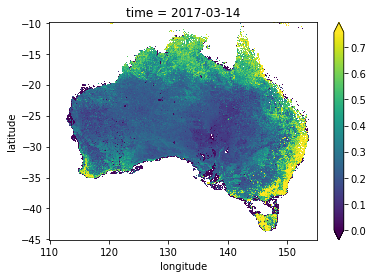

In [59]:
# It's a pretty simple calculation!
NDVI = (nir - red) / (nir + red)
# What happens if you don't exclude negative numbers?  Why might this happen?
NDVI.plot.imshow(robust=True, vmin=0)

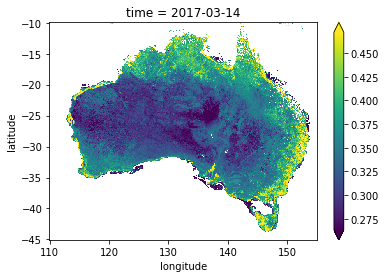

In [60]:
GCC = green / (red + green + blue)
GCC.plot.imshow(robust=True)

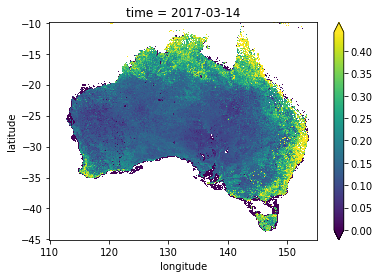

In [61]:
# Using the MODIS-EVI coefficients
L, C1, C2, G = 1, 6, 7.5, 2.5
EVI = G * ((nir - red) / (nir + C1 * red - C2 * blue + L))
EVI.plot.imshow(robust=True, vmin=0)